In [73]:
import numpy as np
import pandas as pd
import streamlit as st

# 파일불러오기
file_path1_4 = './data/tpss_bcycl_od_statnhm_20240104.csv'
file_path1_5 = './data/tpss_bcycl_od_statnhm_20240105.csv'
file_path1_6 = './data/tpss_bcycl_od_statnhm_20240106.csv'

df_rent1_4 = pd.read_csv(file_path1_4,encoding='cp949')
df_rent1_5 = pd.read_csv(file_path1_5,encoding='cp949')
df_rent1_6 = pd.read_csv(file_path1_6,encoding='cp949')

# 전처리

# 날짜별 데이터 합치기
df_rent1 = pd.concat([df_rent1_4,df_rent1_5,df_rent1_6],axis=0)

df_rent1['기준_날짜'] = df_rent1['기준_날짜'].astype('str')
# df_rent1['기준_날짜'] = pd.to_datetime(df_rent1['기준_날짜'], format='%Y-%m-%d')

cond_date = (df_rent1['기준_날짜']=='20240104')
cond_st = (df_rent1['시작_대여소_ID']=='ST-1014')
cond_end = (df_rent1['종료_대여소_ID']=='ST-676')
# cond = cond_date & cond_st & cond_end
cond = (cond_st & cond_end)
df_rent1.loc[cond,:]


,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240104,출발시간,0,ST-1014,신정3동_101_1,ST-676,고척2동_035_1,1,6,2320
316,20240104,도착시간,5,ST-1014,신정3동_101_1,ST-676,고척2동_035_1,1,6,2320


In [6]:
import streamlit as st
import pandas as pd
import numpy as np
import pydeck as pdk


# 데이터 불러오기 : 마스터파일
file_path = './data/서울시 따릉이대여소 마스터 정보.csv'
df_master = pd.read_csv(file_path,encoding='cp949')


# 데이터 전처리

# 경도,위도 컬럼명 변경 : map
df_master.rename(columns={'위도':'lat','경도':'lon'}, inplace = True)

# 이상치 처리(실질적 Nan Data 제거)
# df_master.loc[:,['lat','lon']].plot(kind='box')
# plt.show()

# 경도, 위도가 0인 컬럼이 77개 존재 : 삭제처리
cond = (df_master['lat']==0) | (df_master['lon']==0)
# df_master.loc[cond,:].index
df_master1 = df_master.drop(df_master.loc[cond,:].index,axis=0)
df_master1.reset_index(inplace=True)

df_master1.loc[:,['lat','lon']]

,lat,lon
0,37.534390,126.869598
1,37.524334,126.850548
2,37.510597,126.857323
3,37.529163,126.872749
4,37.521511,126.857384
...,...,...
3188,37.539551,126.828300
3189,37.529900,126.876541
3190,37.510380,126.866798
3191,37.536667,127.073593


In [7]:
chart_data = pd.DataFrame(
   np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
   columns=['lat', 'lon'])
chart_data

,lat,lon
0,37.761143,-122.385385
1,37.766455,-122.350870
2,37.737064,-122.413189
3,37.778185,-122.376696
4,37.789070,-122.408064
...,...,...
995,37.779391,-122.399888
996,37.749205,-122.424062
997,37.751143,-122.390203
998,37.777322,-122.410658


In [4]:
list = [2, 9, 3]
print(list)
list.insert(0, 'a')
print(list)


[2, 9, 3]
['a', 2, 9, 3]


In [5]:
df_rent1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112742 entries, 0 to 112741
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   기준_날짜      112742 non-null  int64 
 1   집계_기준      112742 non-null  object
 2   기준_시간대     112742 non-null  int64 
 3   시작_대여소_ID  112742 non-null  object
 4   시작_대여소명    112742 non-null  object
 5   종료_대여소_ID  112742 non-null  object
 6   종료_대여소명    112287 non-null  object
 7   전체_건수      112742 non-null  int64 
 8   전체_이용_분    112742 non-null  int64 
 9   전체_이용_거리   112742 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 8.6+ MB


In [26]:
df_rent1['기준_날짜'] = df_rent1['기준_날짜'].astype('str')
df_rent1['기준_날짜'] = pd.to_datetime(df_rent1['기준_날짜'], format='%Y-%m-%d').dt.date
df_rent1['기준_날짜'].dt.strftime(%Y-%m-%d)

# 01/13 20:55 여기 strftime 맞는거죠? 형경바보

SyntaxError: invalid syntax (2680042043.py, line 3)

In [ ]:
file_path1_4 = 'tpss_bcycl_od_statnhm_20240104.csv'
file_path1_5 = 'tpss_bcycl_od_statnhm_20240105.csv'
file_path1_6 = 'tpss_bcycl_od_statnhm_20240106.csv'

df_rent1_4 = pd.read_csv(file_path1_4,encoding='cp949')
df_rent1_5 = pd.read_csv(file_path1_5,encoding='cp949')
df_rent1_6 = pd.read_csv(file_path1_6,encoding='cp949')

# 전처리

# 날짜별 데이터 합치기
df_rent1 = pd.concat([df_rent1_4,df_rent1_5,df_rent1_6],axis=0)
print(df_rent1)

df_rent1.reset_index(drop=True, inplace=True)

           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0       20240104  출발시간       0   ST-1014  신정3동_101_1    ST-676  고척2동_035_1   
1       20240104  출발시간       0   ST-1017   목5동_059_1    ST-310   목4동_047_1   
2       20240104  출발시간       0   ST-1055   강일동_001_1   ST-2744   강일동_001_5   
3       20240104  출발시간       0   ST-1082   장지동_019_1   ST-2599   장지동_012_3   
4       20240104  출발시간       0   ST-1092  풍납2동_026_1    ST-502  성내1동_007_1   
...          ...   ...     ...       ...         ...       ...         ...   
112737  20240106  도착시간    2355    ST-884   중앙동_009_1   ST-1548   은천동_065_1   
112738  20240106  도착시간    2355    ST-913  월계3동_039_1   ST-2708  월계2동_025_1   
112739  20240106  도착시간    2355    ST-919  고척1동_006_1   ST-1227  개봉1동_050_1   
112740  20240106  도착시간    2355     ST-93   상암동_026_4     ST-43   신촌동_030_2   
112741  20240106  도착시간    2355    ST-950   조원동_032_1    ST-709   미성동_014_1   

        전체_건수  전체_이용_분  전체_이용_거리  
0           1        6      

In [ ]:
df_rent1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481182 entries, 0 to 112741
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   기준_날짜      481182 non-null  object
 1   집계_기준      481182 non-null  object
 2   기준_시간대     481182 non-null  int64 
 3   시작_대여소_ID  481182 non-null  object
 4   시작_대여소명    481182 non-null  object
 5   종료_대여소_ID  481182 non-null  object
 6   종료_대여소명    479319 non-null  object
 7   전체_건수      481182 non-null  int64 
 8   전체_이용_분    481182 non-null  int64 
 9   전체_이용_거리   481182 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 40.4+ MB


In [ ]:
df_rent1

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,2024-01-04,출발시간,0,ST-1014,신정3동_101_1,ST-676,고척2동_035_1,1,6,2320
1,2024-01-04,출발시간,0,ST-1017,목5동_059_1,ST-310,목4동_047_1,1,6,909
2,2024-01-04,출발시간,0,ST-1055,강일동_001_1,ST-2744,강일동_001_5,1,93,12860
3,2024-01-04,출발시간,0,ST-1082,장지동_019_1,ST-2599,장지동_012_3,1,5,910
4,2024-01-04,출발시간,0,ST-1092,풍납2동_026_1,ST-502,성내1동_007_1,1,5,1063
...,...,...,...,...,...,...,...,...,...,...
112737,2024-01-06,도착시간,2355,ST-884,중앙동_009_1,ST-1548,은천동_065_1,1,6,960
112738,2024-01-06,도착시간,2355,ST-913,월계3동_039_1,ST-2708,월계2동_025_1,1,9,1569
112739,2024-01-06,도착시간,2355,ST-919,고척1동_006_1,ST-1227,개봉1동_050_1,1,6,353
112740,2024-01-06,도착시간,2355,ST-93,상암동_026_4,ST-43,신촌동_030_2,1,37,4579


In [ ]:
df_rent1['기준_날짜'] = df_rent1['기준_날짜'].astype('str')
df_rent1['기준_날짜'] = pd.to_datetime(df_rent1['기준_날짜'], format='%Y-%m-%d')
# cond = df_rent1['기준_날짜']=='2024-01-04'
cond1 = (df_rent1['기준_날짜']=='2024-01-05')
cond2 = (df_rent1['시작_대여소_ID']=='목5동_059_1')
cond3 = (df_rent1['종료_대여소_ID']=='강일동_001_1')
cond = cond1 & cond2 & cond3
df_rent1.loc[cond,:]


,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
37879,2024-01-05,출발시간,840,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,33,1630
39657,2024-01-05,출발시간,845,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,0,0
40534,2024-01-05,도착시간,845,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,0,0
46544,2024-01-05,도착시간,910,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,33,1630
59253,2024-01-05,출발시간,1050,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,2,111,5456
61126,2024-01-05,도착시간,1105,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,14,2360
71078,2024-01-05,도착시간,1225,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,97,3096
71408,2024-01-05,출발시간,1230,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,17,1780
72730,2024-01-05,출발시간,1240,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,26,2577
73794,2024-01-05,도착시간,1245,ST-2031,가양1동_039_8,ST-2031,가양1동_039_8,1,17,1780


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np

# 데이터 불러오기 : 마스터파일
file_path = '서울시 따릉이대여소 마스터 정보.csv'

# 데이터 전처리
df_master = pd.read_csv(file_path,encoding='cp949')

TypeError: 'module' object is not callable

d:\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packa

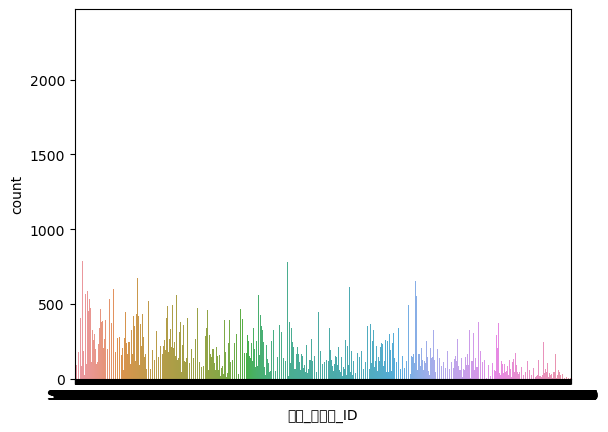

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig1, ax1 = plt.subplots()
# sns.histplot() 실행
sns.countplot(data=df_rent1, x='시작_대여소_ID', ax=ax1)
plt(fig1)

In [167]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 : 마스터파일
file_path = './data/SeoulBikeData.csv'
df_weather = pd.read_csv(file_path,encoding='cp949')


# 데이터 전처리
# 한글이 깨진 컬럼명 변경
df_weather.rename(columns={'Temperature(캜)':'Temperature','Dew point temperature(캜)':'Dew point temperature'},inplace=True)

df_weather

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [220]:
# df_weather.loc[:,'Date':'Month']
# df_weather.max()
df_weather.groupby('Date').sum()

# df_weather.loc[:,'Date':'Rented Bike Count'].groupby('Date').sum()

# cond = df_weather['Date']=='2017-01-12'
# df_weather.loc[df_weather['Date']=='2017-01-12','Rented Bike Count'].sum()  #9539

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
Date,,,,,,,,,,,
2017-01-12,9539,276,-58.9,1101,36.9,44898,-325.1,5.97,0.0,0.0,24
2017-02-12,8523,276,31.8,1487,41.1,35306,-137.2,6.33,0.0,0.0,48
2017-03-12,7222,276,117.0,1957,38.7,10938,45.2,3.01,4.0,0.0,72
2017-04-12,8729,276,-7.3,1260,82.8,32708,-238.2,6.79,0.1,0.0,96
2017-05-12,8307,276,-107.0,874,26.6,47027,-418.2,0.86,0.0,0.0,120
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-07,29428,276,642.6,1954,36.9,32865,557.5,9.92,1.0,0.0,288
2018-12-08,17498,276,736.6,1431,36.1,44321,516.5,18.23,5.0,0.0,288
2018-12-09,31809,276,540.7,1246,31.7,47731,285.8,20.39,0.0,0.0,288


In [183]:
df_weather['Month'] = pd.to_datetime(df_weather['Date']).dt.month


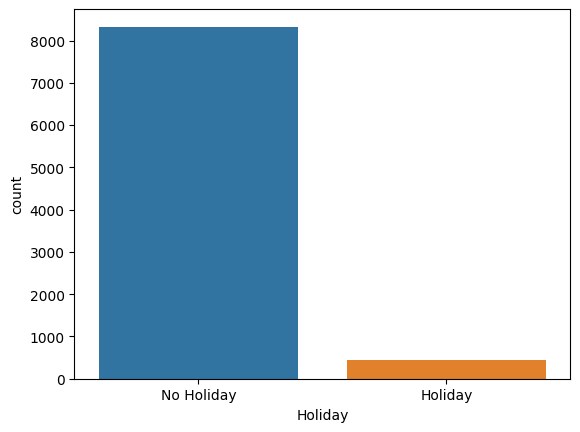

In [196]:
sns.countplot(data=df_weather,x='Holiday')
plt.show()

In [221]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 : 마스터파일
file_path = './data/서울특별시 공공자전거 이용정보(시간대별)_2304.csv'
df_foot = pd.read_csv(file_path,encoding='cp949')

In [222]:
df_foot

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2023-04-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,13.64,0.12,530.00,2
1,2023-04-01,0,2622,2622. 올림픽공원역 3번출구,정기권,NaN,~10대,1,120.36,1.08,4675.83,36
2,2023-04-01,0,2646,2646.레이크펠리스101동앞,정기권,NaN,~10대,1,23.95,0.24,1025.12,6
3,2023-04-01,0,3707,3707. 드래곤타워 앞,정기권,NaN,~10대,1,40.69,0.32,1370.00,9
4,2023-04-01,0,543,543. 구의공원(테크노마트 앞),정기권,NaN,~10대,1,41.03,0.34,1480.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3601042,2023-04-30,23,1601,1601. 석계역 문화광장 내 자전거 보관소,정기권,M,기타,1,56.37,0.51,2190.00,11
3601043,2023-04-30,23,1913,1913. 구로리공원,정기권,M,기타,1,53.77,0.40,1740.86,11
3601044,2023-04-30,23,2108,2108. 은천치안센터,정기권,M,기타,1,17.68,0.17,720.00,4
3601045,2023-04-30,23,2228,2228.뒷벌공원 옆,정기권,M,기타,1,57.32,0.45,1930.00,39


NameError: name 'df_rent1' is not defined